In [1]:
import logging

import matplotlib.pyplot as plt

from numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("numerov").setLevel(logging.WARNING)

In [2]:
state = RydbergState("Rb", n=30, l=0, j=0.5, m=0.5)

lifetime_T0 = state.get_lifetime(0)
lifetime_T300 = state.get_lifetime(300, temperature_unit="K")

print(f"Lifetime at T=0: {lifetime_T0.to('mus'):.2f}")
print(f"Lifetime at T=300K: {lifetime_T300.to('mus'):.2f}")

Lifetime at T=0: 25.50 microsecond
Lifetime at T=300K: 15.83 microsecond


Number of possible transitions: 125


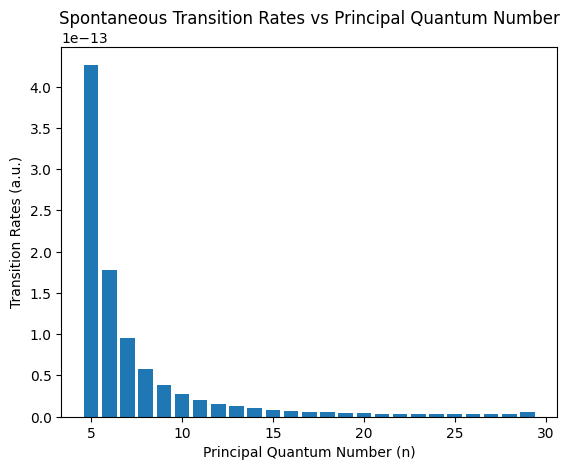

In [3]:
states, transition_rates = state.get_spontaneous_transition_rates(unit="a.u.")
print(f"Number of possible transitions: {len(transition_rates)}")

fig, ax = plt.subplots()

n_list = sorted({s.n for s in states})
transition_rates_n = []
for n in n_list:
    rate = 0
    for i, s in enumerate(states):
        if s.n == n:
            rate += transition_rates[i]
    transition_rates_n.append(rate)


ax.bar(n_list, transition_rates_n)

ax.set_xlabel("Principal Quantum Number (n)")
ax.set_ylabel("Transition Rates (a.u.)")
ax.set_title("Spontaneous Transition Rates vs Principal Quantum Number")

plt.show()

Number of considered transitions: 230


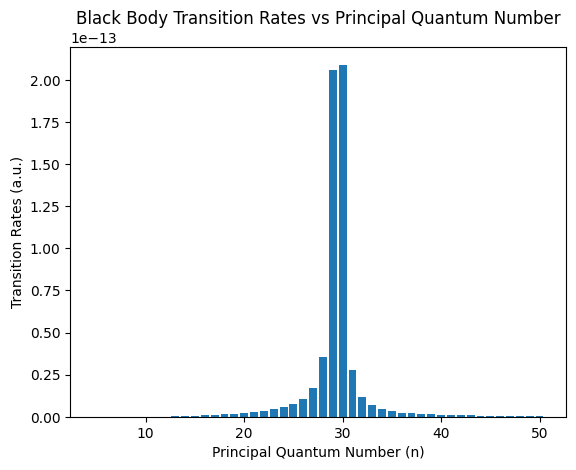

In [4]:
states, transition_rates = state.get_black_body_transition_rates(300, "kelvin", unit="a.u.")
print(f"Number of considered transitions: {len(transition_rates)}")

fig, ax = plt.subplots()

n_list = sorted({s.n for s in states})
transition_rates_n = []
for n in n_list:
    rate = 0
    for i, s in enumerate(states):
        if s.n == n:
            rate += transition_rates[i]
    transition_rates_n.append(rate)

ax.bar(n_list, transition_rates_n)

ax.set_xlabel("Principal Quantum Number (n)")
ax.set_ylabel("Transition Rates (a.u.)")
ax.set_title("Black Body Transition Rates vs Principal Quantum Number")

plt.show()